In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import IBP

(1056, 691, 3)


(80, 44)

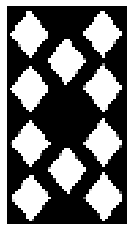

In [2]:
def to_black(path):
    fig = plt.imread(path)[:, :, :3]
    print(fig.shape)
    fig = np.mean(fig, axis = -1)
    #fig[fig < 0.5] = 0
    #fig[fig >= 0.5] = 1
    return 1 - fig

def flatten(fig):
    return fig.reshape(-1)

compress = to_black('poker/10D.png')[130:-130:10, 130:-130:10]
plt.figure(figsize = (2.2, 4))
plt.imshow(compress, cmap = 'gray')
plt.axis('off')
plt.savefig('paper/sample_cropped.png')
compress.shape

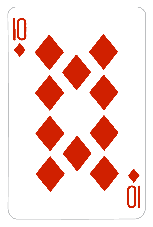

In [3]:
plt.figure(figsize = (2.5, 4))
plt.imshow(plt.imread('poker/10D.png'))
plt.axis('off')
plt.savefig('paper/sample_original.png')

In [4]:
def get_diamond():
    num = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10']
    paths = ['poker/' + n + 'D.png' for n in num]
    imgs = [to_black(path) for path in paths]
    new_img = np.zeros((1056,691))
    new_img[2:-2, 4:-4] = imgs[6]
    imgs[6] = new_img
    return np.stack([flatten(img[130:-130:10,130:-130:10]) for img in imgs])

In [5]:
def get_space():
    num = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10']
    paths = ['poker/' + n + 'S.png' for n in num]
    imgs = [to_black(path) for path in paths]
    #print([img.shape for img in imgs])
    new_img = np.zeros((1056,691))
    new_img[2:-2, 4:-4] = imgs[5]
    imgs[5] = new_img
    return np.stack([flatten(img[130:-130:10,130:-130:10]) for img in imgs])

In [6]:
def get_club():
    num = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10']
    paths = ['poker/' + n + 'C.png' for n in num]
    imgs = [to_black(path) for path in paths]
    #print([img.shape for img in imgs])
    new_img = np.zeros((1056,691))
    new_img[2:-2, 4:-4] = imgs[5]
    imgs[5] = new_img
    return np.stack([flatten(img[130:-130:10,130:-130:10]) for img in imgs])

In [7]:
def get_heart():
    num = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10']
    paths = ['poker/' + n + 'H.png' for n in num]
    imgs = [to_black(path) for path in paths]
    return np.stack([flatten(img[130:-130:10,130:-130:10]) for img in imgs])

(1056, 691, 3)
(1056, 691, 3)
(1056, 691, 3)
(1056, 691, 3)
(1056, 691, 3)
(1056, 691, 3)
(1052, 683, 3)
(1056, 691, 3)
(1056, 691, 3)
(1056, 691, 3)
(100, 3520)


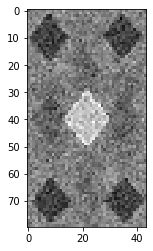

In [8]:
Xd = get_diamond()
X = np.tile(Xd, reps = (10, 1))
X += np.random.normal(0, 0.15, X.shape)
X_avg = np.mean(X, axis=0)
X -= X_avg
print(X.shape)
plt.imshow(X[30].reshape(80, 44), cmap = "gray")

In [9]:
ibp = IBP.IBP(X, sigma_X = (0.1, 1, 1),sigma_A=(0.25, 1, 1), alpha = (1, 1, 1))
hist = ibp.MCMC(300)

Current K = 26:   9%|▉         | 45/500 [03:38<27:46,  3.66s/it]


KeyboardInterrupt: 

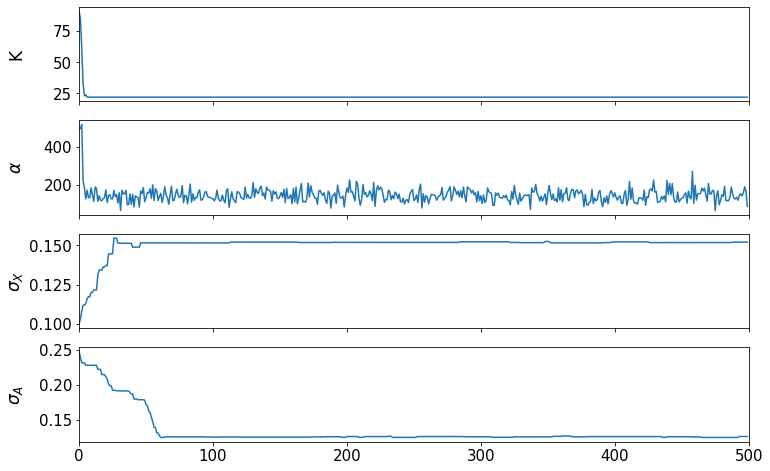

In [27]:
fig, ax = plt.subplots(4,1,sharex = True, figsize = (12,8))
ax[0].plot(hist['K'])
ax[0].set_ylabel('K', fontsize = 17)
ax[1].plot(hist['alpha'])
ax[1].set_ylabel('$\\alpha$',fontsize = 17)
ax[2].plot(hist['sigma_X'])
ax[2].set_ylabel('$\\sigma_X$',fontsize = 17)
ax[3].plot(hist['sigma_A'])
ax[3].set_ylabel('$\\sigma_A$',fontsize = 17)
plt.xlim(0,500)
for i in range(4):
    ax[i].tick_params(labelsize=15)
fig.align_ylabels(ax)
plt.savefig('paper/gibbsresult.png')

In [31]:
A = ibp.postMean()
A_imgs = A.reshape(-1, 80, 44)

In [ ]:
num = A_imgs.shape[0]
f = plt.figure(figsize = (15,9))
gs = gridspec.GridSpec(1, 2, figure = f)
gs0 = gridspec.GridSpecFromSubplotSpec(5, (num - 1) // 5 + 1, subplot_spec=gs[0])
for i in range(num):
    sp = f.add_subplot(gs0[i % 5, i // 5])
    sp.set_xticks([])
    sp.set_yticks([])
    sp.imshow(A_imgs[i], cmap = 'gray')
X_imgs = (hist['Z'][-1] @ A).reshape(-1, 80, 44)
# X_imgs[X_imgs >= 0.5] = 1
# X_imgs[X_imgs < 0.5] = 0
gs1 = gridspec.GridSpecFromSubplotSpec(10, (X_imgs.shape[0] - 1) // 10 + 1, subplot_spec=gs[1])
for i in range(X_imgs.shape[0]):
    sp = f.add_subplot(gs1[i % 10, i // 10])
    sp.set_xticks([])
    sp.set_yticks([])
    sp.imshow(X_imgs[i], cmap = 'gray')

In [ ]:
X_org = X.reshape(-1, 80, 44)
num = X_org.shape[0]
f = plt.figure(figsize = (20,12))
plt.axis('off')
g =  gridspec.GridSpec(2,1,figure = f, height_ratios=[8,1])
gs = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec = g[0])
gs0 = gridspec.GridSpecFromSubplotSpec(10, (num - 1) // 10 + 1, subplot_spec=gs[0])
for i in range(num):
    sp = f.add_subplot(gs0[i % 10, i // 10])
    sp.set_xticks([])
    sp.set_yticks([])
    sp.imshow(X_org[i], cmap = 'gray')
X_imgs = (hist['Z'][-1] @ A).reshape(-1, 80, 44)
# X_imgs[X_imgs >= 0.5] = 1
# X_imgs[X_imgs < 0.5] = 0

gs1 = gridspec.GridSpecFromSubplotSpec(10, (X_imgs.shape[0] - 1) // 10 + 1, subplot_spec=gs[1])
for i in range(X_imgs.shape[0]):
    sp = f.add_subplot(gs1[i % 10, i // 10])
    sp.set_xticks([])
    sp.set_yticks([])
    sp.imshow(X_imgs[i], cmap = 'gray')

gsb = gridspec.GridSpecFromSubplotSpec(1, A_imgs.shape[0], subplot_spec=g[1])
for i in range(A_imgs.shape[0]):
    sp = f.add_subplot(gsb[0, i])
    sp.set_xticks([])
    sp.set_yticks([])
    sp.imshow(A_imgs[i], cmap = 'gray')

In [29]:
def feature_map(feature, X_prior, Z, shape, order, truncate = None):
    feature = feature[order, :]
    Z = Z[:, order]
    if truncate is not None:
        feature = feature[:truncate, :]
        Z = Z[:, :truncate]
    X = X_avg.reshape(shape)
    X_post = Z @ feature
    f = plt.figure(figsize = (18,12))
    plt.axis('off')
    positive = np.tile(np.array([[[0.29803923, 0.6431373, 0.24705882]]]), reps = (*shape, 1))
    negative = np.tile(np.array([[[0.9, 0.9, 0.9]]]), reps = (*shape, 1))
    grid = gridspec.GridSpec(nrows = (X_prior.shape[0] + 1), ncols = (feature.shape[0] + 3), figure = f)
    sp = f.add_subplot(grid[0, 1])
    sp.set_xticks([])
    sp.set_yticks([])
    sp.imshow(X, cmap = 'gray')
    for idf in range(feature.shape[0]):
        sp = f.add_subplot(grid[0, idf + 2])
        sp.set_xticks([])
        sp.set_yticks([])
        sp.imshow(feature[idf].reshape(shape) + X, cmap = 'gray')
    for idx in range(X_prior.shape[0]):
        sp = f.add_subplot(grid[idx + 1, 0])
        sp.set_xticks([])
        sp.set_yticks([])
        sp.imshow(X_prior[idx].reshape(shape) + X, cmap = 'gray')
        sp = f.add_subplot(grid[idx + 1, -1])
        sp.set_xticks([])
        sp.set_yticks([])
        sp.imshow(X_post[idx].reshape(shape) + X, cmap = 'gray')
    for i in range(Z.shape[0]):
        sp = f.add_subplot(grid[i + 1, 1])
        sp.set_xticks([])
        sp.set_yticks([])
        sp.axis('off')
        sp.imshow(positive)
        for j in range(Z.shape[1]):
            back = positive if Z[i,j] == 1 else negative
            sp = f.add_subplot(grid[i + 1, j + 2])
            sp.set_xticks([])
            sp.set_yticks([])
            sp.axis('off')
            sp.imshow(back)

In [36]:
np.linalg.matrix_rank(Z)

19

[51. 43. 39. 36. 35. 30. 26. 24. 21. 17. 16. 15. 15. 15. 13. 11. 10. 10.
 10. 10. 10.  5.]


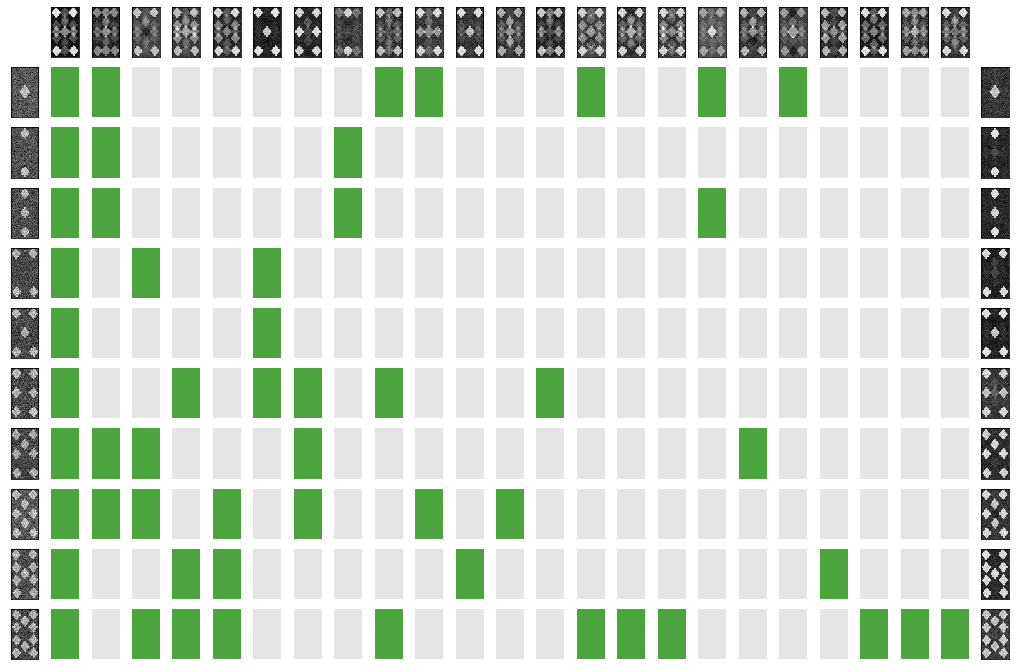

In [35]:
Z = hist['Z'][-1]
print(np.sort(np.sum(Z, axis = 0))[::-1])
feature_map(A, X[:10], Z[:10], (80, 44), order = np.argsort(np.sum(Z, axis = 0))[::-1])

In [ ]:
Z = hist['Z'][-1]
K = 12
feature_map(A, X[:10], Z[:10], (80, 44), order = np.argsort(np.sum(Z, axis = 0))[::-1], truncate = K)

In [ ]:
print(hist['Z'][-1][:,-1])